<a href="https://colab.research.google.com/github/rafsanalhad/machine_learning_jobsheet/blob/main/Pertemuan3_Praktikum1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [3]:
# Melakukan pembacaan dataset
df = pd.read_csv("dataset1.csv")

# Penjelasakan kode diatas
# pd.read_csv() digunakan untuk membaca file csv
# Yang kemudian hasil pembacaan file csv tersebut disimpan ke dalam variabel df

# Memahami tentang isi dataset

In [4]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\r\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\r\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\r\nCobbborough,...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\r\nPort Jason, OH 22070-...",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\r\nPort Jacobville, PR...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [5]:
df.shape

(500, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [7]:
# Menampilkan deskripsi tentang dataset menggunakan .describe()
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


# Visualisasi Data

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


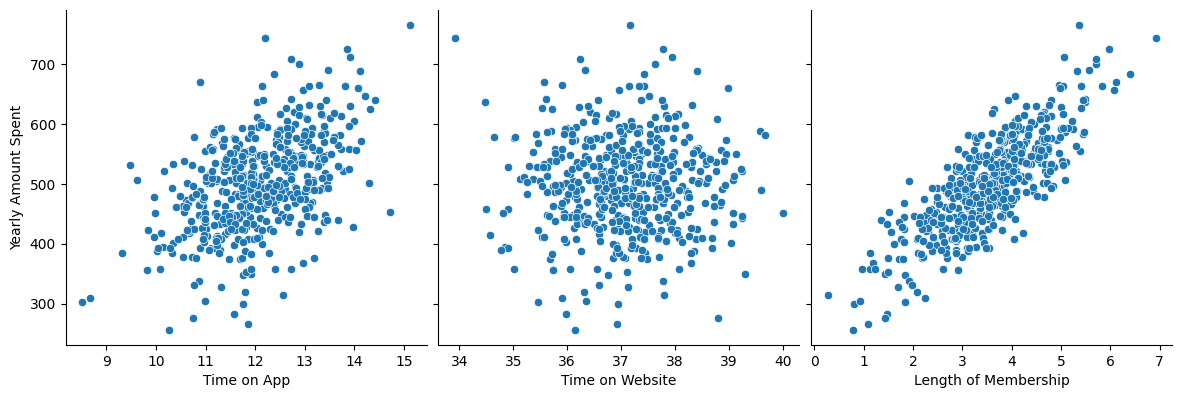

In [8]:
sns.pairplot(df, x_vars=['Time on App', 'Time on Website', 'Length of Membership'], y_vars='Yearly Amount Spent', size=4, aspect=1, kind='scatter')
plt.show()

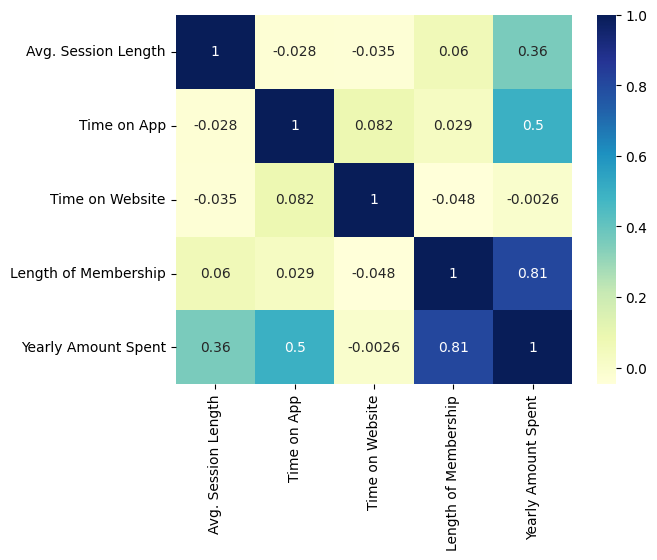

'\n    1. Melihat korelasi antar variable\n    2. Melihat identifikasi pola pada data\n    3. Untuk menentukan/melihat outlier pada dataset\n    4. Untuk melihat hubungan antar banyak variable\n'

In [9]:
# Melakukan visualisasi menggunakan heatmap

df_numeric = df.select_dtypes(exclude=['object'])

sns.heatmap(df_numeric.corr(), cmap='YlGnBu', annot=True)
plt.show()

# Penjelasan kode diatas
# df.select_dtypes(exclude=['object']) digunakan untuk mengecualikan tipe data object pada dataset
# snd.heatmap() digunakan untuk membuat heatmap dari dataset
# cmap digunakan untuk memberikan warna pada heatmap
# annot digunakan untuk menampilkan angka pada heatmap

# Informasi yang bisa didapatkan dari heatmap
'''
    1. Melihat korelasi antar variable
    2. Melihat identifikasi pola pada data
    3. Untuk menentukan/melihat outlier pada dataset
    4. Untuk melihat hubungan antar banyak variable
'''

# Regresi Linier

In [10]:
X = df['Length of Membership']
y = df['Yearly Amount Spent']

In [11]:
# Melakukan pemisahan data training dan data testing

X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.7, random_state=100)

In [12]:
# Melakukan training model menggunakan library statsmodels

X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()

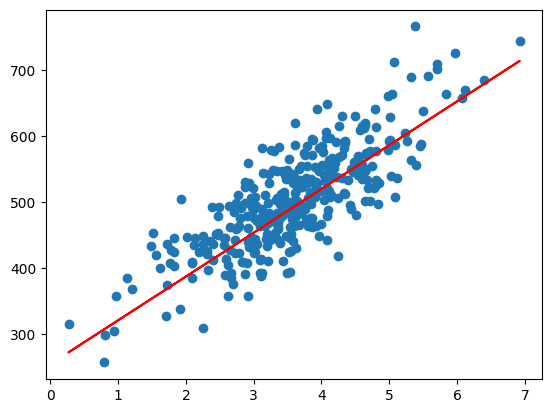

In [13]:
# Visualisasi hasil training model
plt.scatter(X_train, y_train)
plt.plot(X_train, 254.2483 + 66.3015 * X_train, 'r')
plt.show()

# Analisis Residual

In [15]:
# Melakukan prediksi nilai dari data training

y_train_pred = lr.predict(X_train_sm)
res = y_train - y_train_pred

<Figure size 640x480 with 0 Axes>

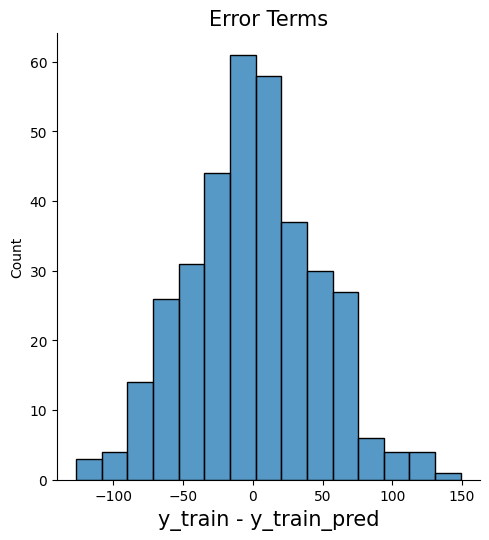

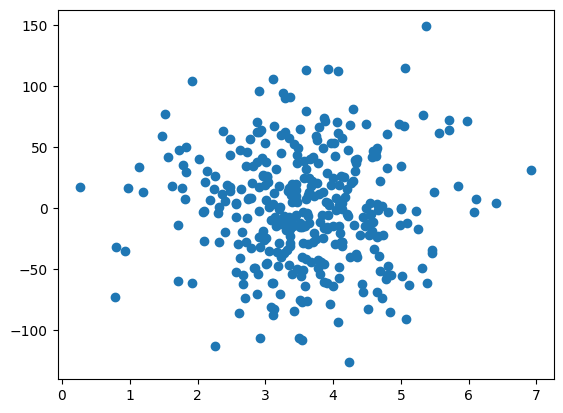

In [16]:
# Menampilkan plot histogram residual
fig = plt.figure()
sns.displot(res, bins=15)
plt.title('Error Terms', fontsize=15)
plt.xlabel('y_train - y_train_pred', fontsize=15)
plt.show()


# Menampilkan plot scatter residual
plt.scatter(X_train, res)
plt.show()

In [17]:
# Melakukan prediksi pada data testing
X_test_sm = sm.add_constant(X_test)
y_test_pred = lr.predict(X_test_sm)

In [18]:
# Mengitung nilai R-squared

r_squared = r2_score(y_test, y_test_pred)

# Penjelasan kode diatas
# r2_score() digunakan untuk menghitung nilai R-squared dari prediksi data testing dan data testing yang sebenarnya

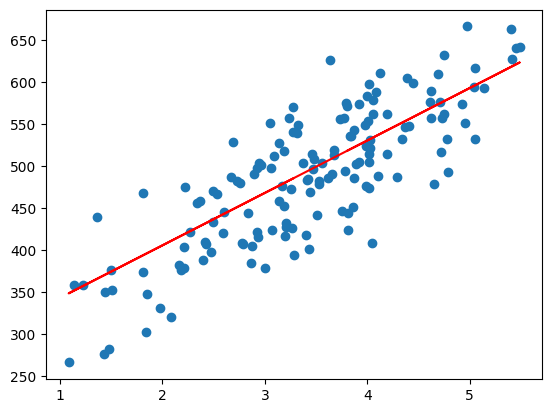

In [19]:
# Menampilkan visualisasi data uji dan hasil prediksi
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()